<a href="https://colab.research.google.com/github/minggarputra24/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


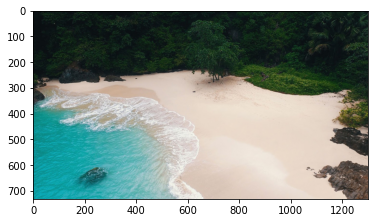

In [3]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/PCVK/Images/Pantai-Teluk-Ijo.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

# Tugas Praktikum


1.   **Buat Gamma Correction sesuai dengan petunjuk berikut :**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction Pada Citra 
----------------------------------
Masukkan Nilai Gamma: 6


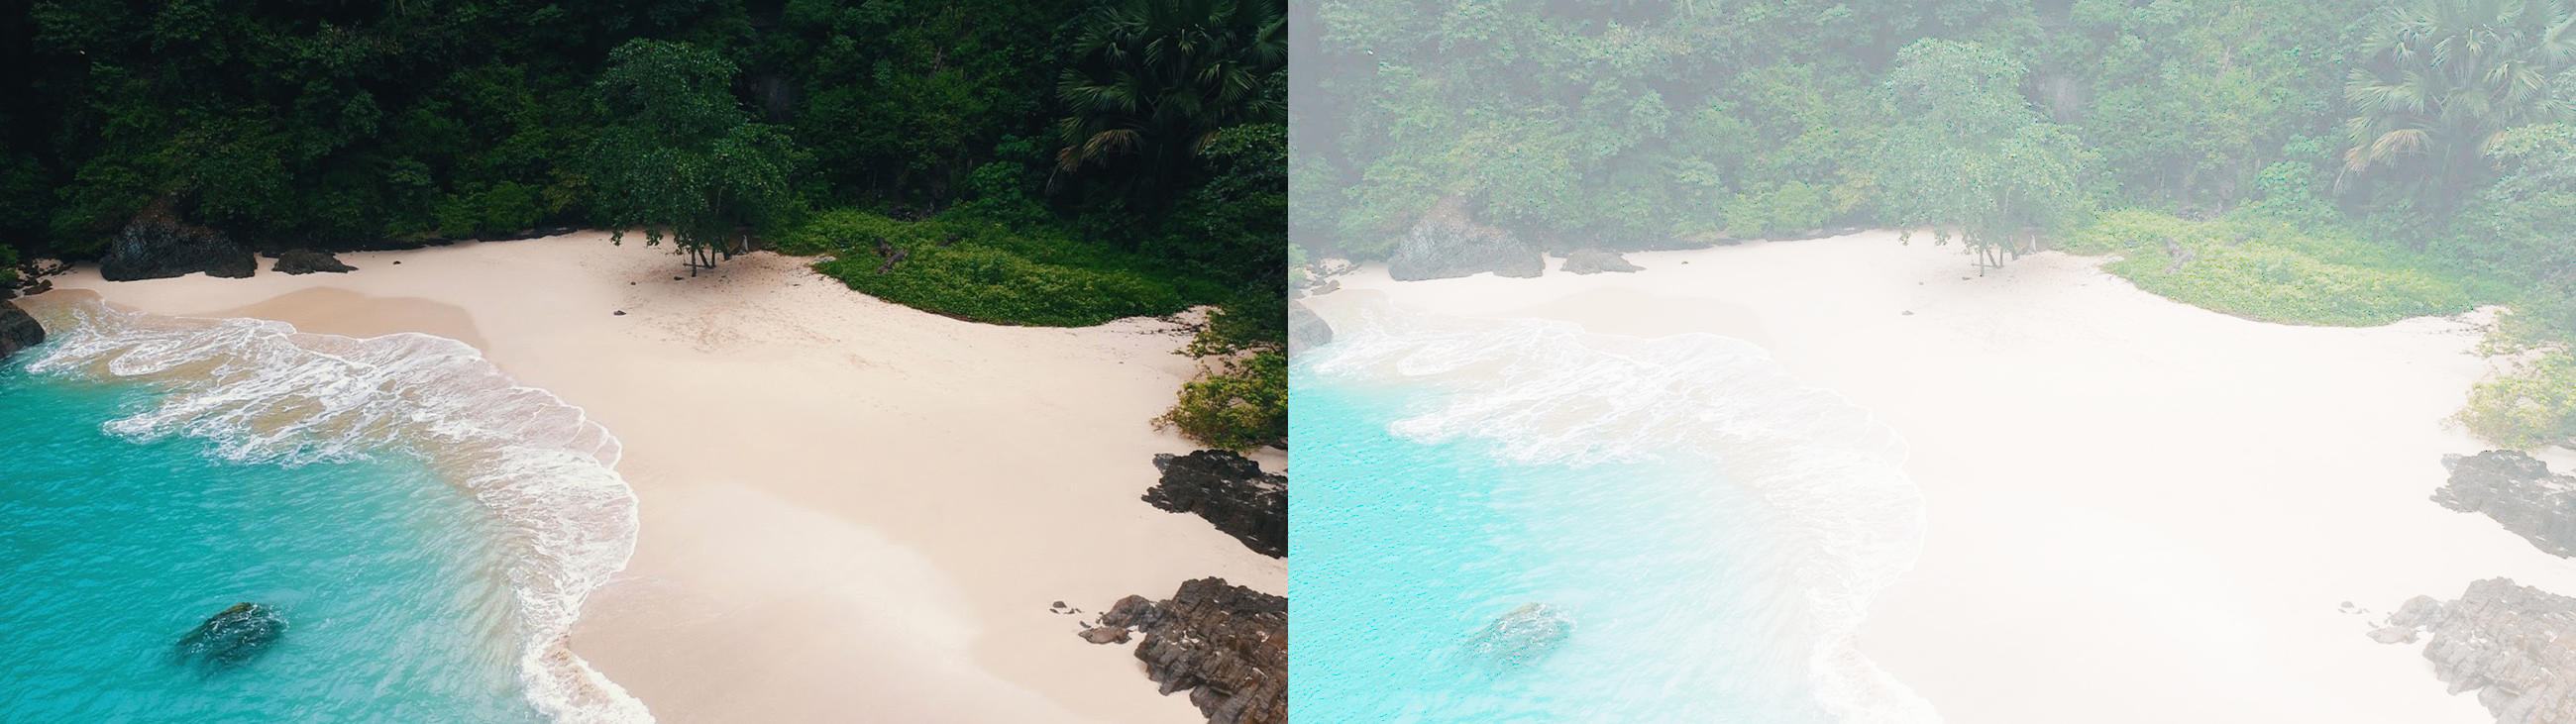

In [6]:
print(' Gamma Correction Pada Citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)



3.   **Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. 
Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).



In [9]:
from math import log10, sqrt 

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original = cv.imread('/content/drive/MyDrive/PCVK/Images/Galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah = 5
for i in range(jumlah):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah)

psnr = PSNR(original, denoised_image)

print('PSNR value is ',psnr,' dB')

NameError: ignored



4.   Buat image masking untuk image berikut. Image kiri adalah image asli(**images/teeth.jpg**), sedangkan image kanan adalah hasilnya:



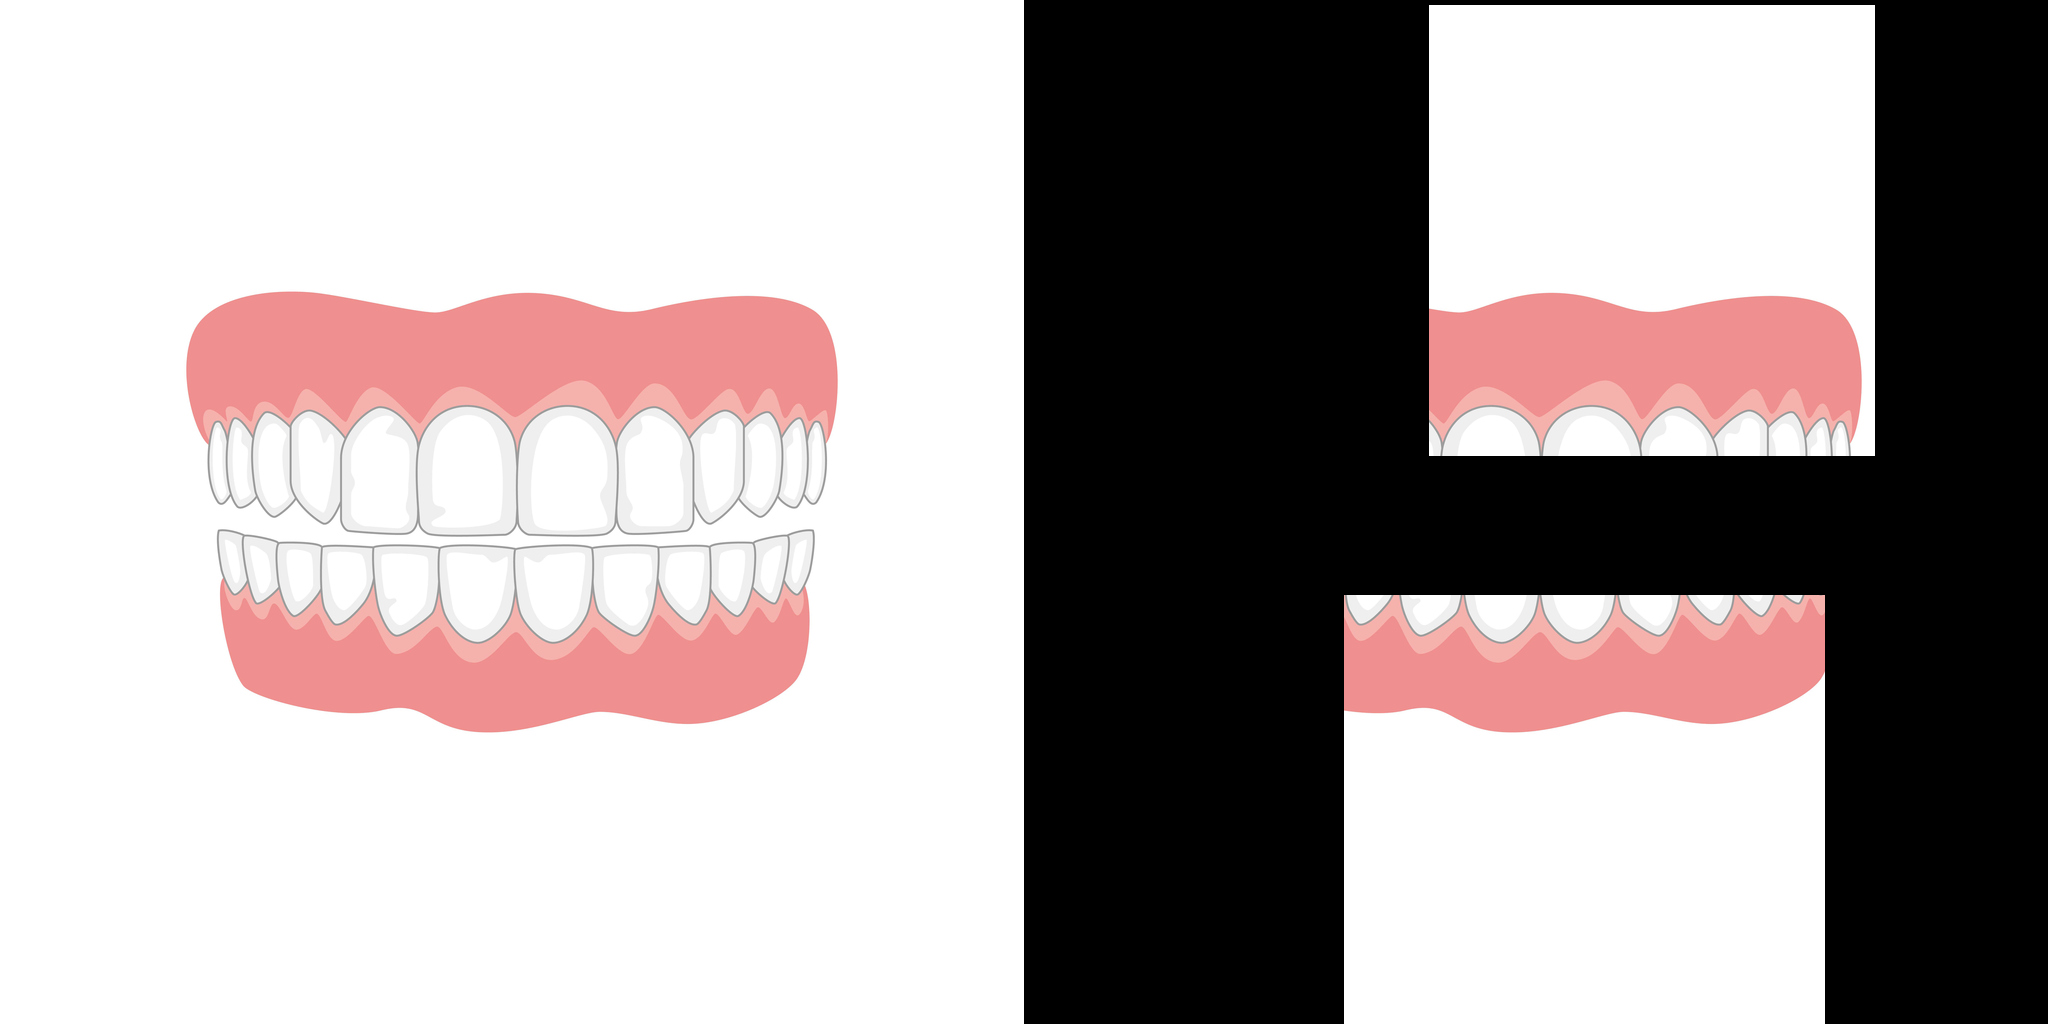

In [36]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Teeth.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5) 
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)



5.   Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.



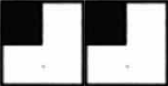

In [41]:
#OR

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Gambar1.png')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

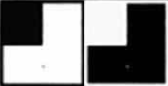

In [42]:
# NOT

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Gambar1.png')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

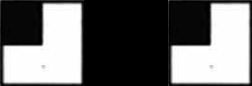

In [43]:
# AND
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Gambar1.png')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


> Hasil Analisa :

Untuk membuat aplikasi Gamma Correction, simulasi Citra dengan image depth yang ditentukan, melakukan denoising dengan menggunakan Averaging,melakukan image masking menggunakan logical operator.


*   Operator AND hanya akan menghasilkan True jika kedua operand bernilai True, selain itu hasilnya False.
*   Operator OR hanya akan menghasilkan True jika salah satu operand bernilai True, bernilai False jika kedua operand juga bernilai False.
*   Operator NOT akan membalikkan logika, not False menghasilkan True, dan not True menghasilkan False.






  